# ECC4200 Visual Computing and Machine Perception Project #1

In this project, you are going to start an exciting journey to explore Deep Learning and Neural Networks by completing the following three tasks:

* **Task 1. Understanding and conducting convolution (8%).**
* **Task 2. Building and training a ResNet18 model (52%).**
* **Task 3. Exploring and explaining the trained model (40%).**

Before doing the project, please read the instructions carefully (failure to do so will be penalized):

1. Implement your codes **within** "TODO" and "END OF YOUR CODE", do **NOT** modify any codes outside the answer area;
2. Make sure your codes **clean**, **easily readable** (add meaningful comments if needed), and **runnable**;
3. Write your answers in the given markdown cells, keep your answers clear and concise;
4. Do submit your project before the deadline: **31 March, 23:59 SGT (Singapore Time)**. The deadline is strict. **Late submission will be deducted 10 points (out of 100) for every 24 hours**;
5. Once you finish the tasks, **compress the finished notebook (.ipynb file) and the saved model (model_resnet18.pt file) into a zip file**, and then **submit the zip file named as "StudentID_Name_ECC4200_project1.zip"**. Make sure that the **submitted notebook has been run** and the **cell outputs are visible**;
6. This is an individual project, do **NOT** share your solutions with others, we have zero tolerance for cheating.

Note:

1. It is recommended to do model training on GPU, you may use [Colab](https://colab.google/) or [Kaggle](https://www.kaggle.com/) for free computing resources for faster training.
2. Since free computing resources accessible on [Colab](https://colab.google/) is limited for unsuscribed users for each day, it is recommended to debug on your CPU first.

## Task 1: Understanding and conducting convolution (8%)
**Subtasks**
1. Use numpy to conduct 2D standard convolution operation (4%).
2. Use numpy to conduct 2D dilated convolution operation (4%).

You may refer to *["A guide to convolution arithmetic for deeplearning"](https://arxiv.org/pdf/1603.07285.pdf)* for details of dilated convolution.

In this task, we follow the settings as in the paper:
* 2-D discrete convolutions,
* square inputs,
* square kernel size,
* same strides along both axes,
* same zero padding along both axes.

Score points:
1. The implementations are correct.
2. The implementation of dilated convolution makes use of the relationship between dilated convolution kernel and standard convolution kernel.

In [68]:
import numpy as np

In [69]:
def conv2d(inputs,kernels,padding=0, stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO: conduct convolution calculation based on given inputs, kernels,      #
    #       padding and stride values.                                           #
    ##############################################################################
    # your code
    
    # 计算输出数组的形状
    outputs_height = (inputs.shape[1] + 2 * padding - (kernels.shape[2] - 1)) // stride + 1
    outputs_width = (inputs.shape[2] + 2 * padding - (kernels.shape[3] -1 )) // stride + 1
    
    # 初始化输出数组
    outputs = np.zeros((kernels.shape[0], outputs_height, outputs_width))
    
    # 执行二维标准卷积运算
    for channel in range(kernels.shape[0]):
        for i in range(outputs_height):
            for j in range(outputs_width):
                # 计算输入数据对应区域的索引范围
                input_i_start = i * stride
                input_i_end = input_i_start + kernels.shape[2]
                input_j_start = j * stride
                input_j_end = input_j_start + kernels.shape[3]
                
                # 切片输入数据，并与卷积核进行乘法运算
                outputs[channel, i, j] = np.sum(inputs[:, input_i_start:input_i_end, input_j_start:input_j_end] * kernels[channel, :, :, :])
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [70]:
def dilated_conv2d(inputs,kernels,dilation,padding=0,stride=1):
    assert inputs.shape[0] == kernels.shape[1], "The numbers of channels of input and kernel do not match."
    ##############################################################################
    # TODO: conduct dilated convolution calculation based on given inputs,       #
    #       kernels, padding and stride values.                                  #
    ##############################################################################
    # your code

   # 计算输出数组的形状
    outputs_height = (inputs.shape[1] + 2 * padding - (kernels.shape[2] - 1) * dilation) // stride + 1
    outputs_width = (inputs.shape[2] + 2 * padding - (kernels.shape[3] - 1) * dilation) // stride + 1

    # 初始化输出数组
    outputs = np.zeros((kernels.shape[0], outputs_height, outputs_width))

    # 执行二维标准卷积运算
    for channel in range(kernels.shape[0]):
        for i in range(outputs_height):
            for j in range(outputs_width):
                # 计算卷积核的填充位置
                pad_top = max(0, (kernels.shape[2] - 1) * dilation - i * stride)
                pad_bottom = max(0, i * stride)
                pad_left = max(0, (kernels.shape[3] - 1) * dilation - j * stride)
                pad_right = max(0, j * stride)

                # 对卷积核进行填充
                padded_kernel = np.pad(kernels[channel, :, :, :], ((0, 0), (pad_top, pad_bottom), (pad_left, pad_right)), mode='constant')

                # 计算卷积运算结果
                input_i_start = max(0, i * stride - pad_top)
                input_i_end = min(inputs.shape[1], input_i_start + padded_kernel.shape[1])
                input_j_start = max(0, j * stride - pad_left)
                input_j_end = min(inputs.shape[2], input_j_start + padded_kernel.shape[2])
                # 切片输入数据，并与填充后的卷积核进行乘法运算
                outputs[channel, i, j] = np.sum(inputs[:, input_i_start:input_i_end, input_j_start:input_j_end] * padded_kernel[:, :input_i_end - input_i_start, :input_j_end - input_j_start])

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    return outputs

In [71]:
np.random.seed(2024)
inputs = np.random.randint(0,3,size=(2,5,5))
kernels = np.random.randint(0,3,size=(3,2,2,2))
print(f"Inputs:\n{inputs}\n")
print(f"Kernels:\n{kernels}")

Inputs:
[[[0 2 0 0 0]
  [2 1 1 0 2]
  [2 0 1 0 1]
  [2 2 2 0 2]
  [2 1 2 2 0]]

 [[2 1 2 2 1]
  [1 1 2 0 1]
  [2 2 2 0 2]
  [0 2 1 2 2]
  [0 0 1 2 1]]]

Kernels:
[[[[0 0]
   [1 2]]

  [[2 0]
   [2 0]]]


 [[[1 1]
   [2 2]]

  [[0 0]
   [0 1]]]


 [[[1 0]
   [1 1]]

  [[1 1]
   [0 0]]]]


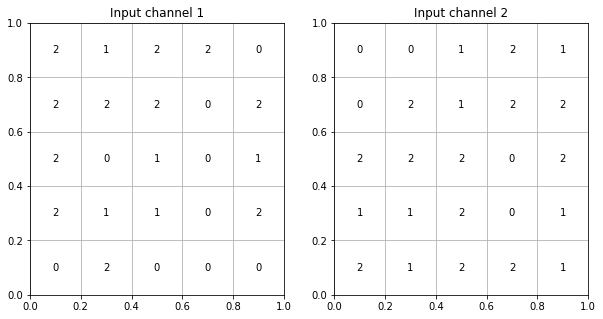

In [72]:
# visualize inputs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i in range(inputs.shape[0]):
    ax = fig.add_subplot(1, inputs.shape[0], i+1, xticks=[], yticks=[])
    ax.set_title('Input channel %s' % str(i+1))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(True)
    width = inputs[i].shape[0]
    height = inputs[i].shape[1]


    ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
    for x in range(width):
        for y in range(height):
            ax.annotate(str(inputs[i][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                        horizontalalignment='center',
                        verticalalignment='center')


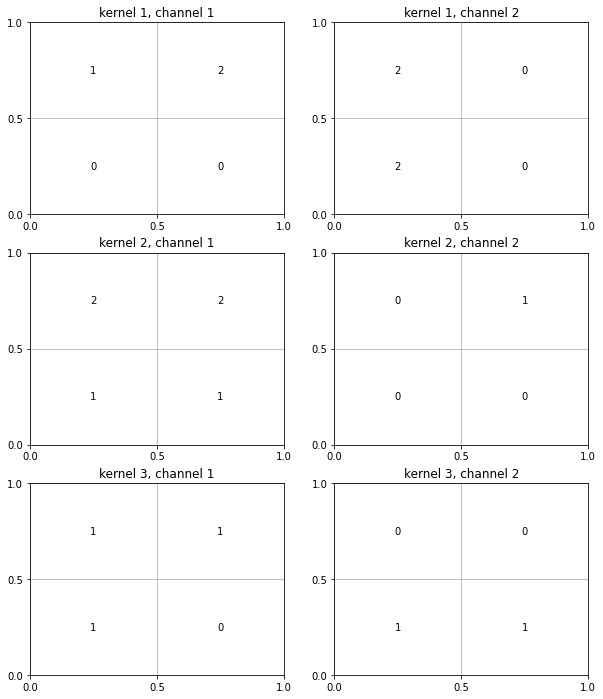

In [73]:
# visualize kernels
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 12))
for i in range(kernels.shape[0]):
    for j in range(kernels.shape[1]):
        ax = fig.add_subplot(kernels.shape[0], kernels.shape[1], i*kernels.shape[1] + j+1, xticks=[], yticks=[])
        ax.set_title(f'kernel {str(i+1)}, channel {str(j+1)}')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(True)
        width = kernels[i][j].shape[0]
        height = kernels[i][j].shape[1]


        ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=width))
        ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=height))
        for x in range(width):
            for y in range(height):
                ax.annotate(str(kernels[i][j][x][y]), xy=(y/height+(0.5/height),x/width+(0.5/height)),
                            horizontalalignment='center',
                            verticalalignment='center')

In [74]:
conv2d(inputs,kernels,stride=1)

array([[[10.,  7.,  9.,  8., 10.],
        [ 8.,  8.,  9.,  2.,  9.],
        [10., 14.,  8.,  8., 14.],
        [ 4.,  9., 10., 10.,  6.],
        [ 4.,  5., 10., 10.,  4.]],

       [[ 9.,  8.,  2.,  5.,  9.],
        [ 9.,  6.,  3.,  6., 10.],
        [12., 10.,  7.,  7., 12.],
        [10., 11., 12.,  7.,  5.],
        [ 9., 10., 14.,  7.,  1.]],

       [[ 6.,  7.,  5.,  5.,  6.],
        [ 6.,  5.,  4.,  2.,  6.],
        [10.,  8.,  5.,  4.,  9.],
        [ 7.,  8.,  9.,  6.,  6.],
        [ 5.,  5.,  9.,  7.,  2.]]])

In [75]:
dilated_conv2d(inputs,kernels,dilation=2)

array([[[ 8., 14.,  8.,  8.],
        [ 9.,  8.,  9.,  2.],
        [ 8., 14.,  8.,  8.],
        [10.,  9., 10., 10.]],

       [[ 7., 10.,  7.,  7.],
        [ 3.,  6.,  3.,  6.],
        [ 7., 10.,  7.,  7.],
        [12., 11., 12.,  7.]],

       [[ 5.,  8.,  5.,  4.],
        [ 4.,  5.,  4.,  2.],
        [ 5.,  8.,  5.,  4.],
        [ 9.,  8.,  9.,  6.]]])

## Task 2: Building and training a ResNet18 model (52%)
**Subtasks**
1. Figure out the ResNet18 model architecture and write down the dimension of features of each layer (4%).
2. Build a ResNet18 model by PyTorch (20%).
3. Complete the codes to evaluate and train the model. (10%)
4. Viusalize the training curves (2%).
5. Point out a potential problem in the training process (2%), propose possible solutions (4%) to improve and implement **at least ONE** of them (10%).

Score points:
1. The results for subtask 1 is correct.
2. The implementation for subtask 2 is correct.
3. The implementation for subtask 2 is also concise, i.e., building the network block by block instead of layer by layer.
4.
5. The two plots for visualization contain all information of interest, one for loss curves and another for accuracy curves.
6. The answers to subtask 5 are reasonable and the implementation is correct.


### Prepare packages and dataset

In [76]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import time

In [77]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_size = len(train_set)
print(train_size)
test_size = len(test_set)
print(test_size)

Files already downloaded and verified
Files already downloaded and verified
50000
10000


### Define the ResNet18 model

Residual Network (ResNet) is a deep learning model widely used for computer vision applications. It is a Convolutional Neural Network (CNN) architecture. ResNet provides an innovative solution to the vanishing gradient problem, known as “residual connections”.

ResNet includes multiple "residual blocks", each of which contains certain types of layers and residual connections as shown in the figure below.

Refer to the paper *["Deep Residual Learning for Image Recognition"](https://arxiv.org/pdf/1512.03385.pdf)* for information about ResNet architecture.

Figure out the architecture of ResNet18 and the feature dimension of each layer, considering the input dimension as `(3,32,32)` representing `(C, H, W)`. Write down the architecture and the feature dimension corresponding to each layer in the following markdown cell.

Implement to define a ResNet18 model in the following code block.

Note that while doing residual connection, if the dimensions of the input and output of the residual block are not the same, we adjust channels and resolution of the input by means of a convolution before adding.

![](resnet-block.svg)




---
**Write down your results of the ResNet18 architecture and specify the feature dimension for each layer.**
Here are the results of the ResNet18 architecture and the feature dimensions for each layer:

1. Input layer:
   - Shape: (3, 32, 32)
   - Explanation: RGB image with 32x32 resolution.

2. Convolutional layer (conv1):
   - Number of filters: 64
   - Kernel size: 7x7
   - Stride: 2
   - Padding: 3
   - Output shape: (64, 16, 16)
   - Explanation: 64 filters with 7x7 kernel size, followed by stride 2 and padding 3, resulting in output feature maps of size 16x16.

3. Residual blocks (layer1, layer2, layer3, layer4):
   - Each block contains two residual units (basic blocks).
   - Basic block structure:
     - Convolutional layer 1: 64 filters, 3x3 kernel size, stride 1, padding 1
     - Batch normalization
     - ReLU activation
     - Convolutional layer 2: 64 filters, 3x3 kernel size, stride 1, padding 1
     - Batch normalization
     - Residual connection: Identity mapping (no change in dimension)
   - Output shape after each layer:
     - layer1: (64, 16, 16)
     - layer2: (128, 8, 8)
     - layer3: (256, 4, 4)
     - layer4: (512, 2, 2)

4. Average pooling layer (avg_pool):
   - Kernel size: 4x4
   - Stride: 4
   - Output shape: (512, 1, 1)
   - Explanation: Global average pooling reduces each 2x2 feature map to a single value, resulting in a feature vector of size 512x1x1.

5. Fully connected layer (fc):
   - Input size: 512
   - Output size: Number of classes (10 in CIFAR-10)
   - Explanation: Linear layer for classification.

Overall, ResNet18 gradually reduces spatial dimensions while increasing the number of filters, leading to hierarchical feature extraction culminating in a classification output.
```

```

---

In [78]:
class ResidualBlock(nn.Module):
    def __init__(self, input_channels, num_channels,
                 strides = 1):
        '''
        input_channels: the number of channels of input x.
        num_channels: the number of channels channels of the output of the residual block.
        strides: the strides for the first convolutional layer in the residual block, 
                 note that this is not applied to the second convolutional layer in the residual block.
        '''
        ##############################################################################
        # TO DO: Define a ResidualBlock module as the figure shown above.            #
        ##############################################################################
        #your code
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3, stride=strides, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.downsample = None
        if strides != 1 or input_channels != num_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides, bias=False),
                nn.BatchNorm2d(num_channels)
            )

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################


    def forward(self, X):
        ##############################################################################
        # TO DO: implement the forward path of the ResidualBlock module.             #
        ##############################################################################
        #your code

        identity = X
        out = self.conv1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(X)
        out += identity
        out = self.relu(out)
        return out
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

In [80]:
class ResNet18(nn.Module):
    ##############################################################################
    # TO DO: Define a ResNet18 model and implement its forward path, you may     #
    #        also add other functions to this class if necessary.                #
    ##############################################################################
    # your code
    
    def __init__(self, num_classes=10):
        super(ResNet18, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(64, 64, 2)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, X):
        out = self.conv1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

In [81]:
model = ResNet18()
model

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=

### Train the model

In [82]:
# Hyperparameters
epochs = 10
batch_size = 256
learning_rate = 0.1

# Set up optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Build data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, shuffle = True, num_workers = 0)
test_loader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, shuffle = False, num_workers = 0)

data_loaders = {"train": train_loader, "test": test_loader}
dataset_sizes = {"train": train_size, "test": test_size}

Write a functions to evaluate the model on testing set and train the model for one epoch in the following code block.

In [83]:
def eval_on_test_set(model):
    model.eval()
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    model.to(device)
    running_accuracy = 0
    loss = 0

    for data in test_loader:
        ##############################################################################
        # TODO: Implement the evaluation process on test set.                        #
        ##############################################################################
        # your code
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        batch_loss = criterion(outputs, labels)
        loss += batch_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        running_accuracy += correct
        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################
    total_loss=loss/test_size
    total_accuracy = running_accuracy / test_size
    print('Evaluation on test set: loss={:.3f} \t accuracy={:.2f}%'.format(total_loss, total_accuracy * 100))
    model.train()
    return total_loss, total_accuracy

In [85]:
def train_for_one_epoch(model):
    model.train()
    # Set up device
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    name = torch.cuda.get_device_name()
    print('Using device '+ name + ' to train the model.')
    model.to(device)

    # set the running quatities to zero at the beginning of the epoch
    running_loss = 0
    running_accuracy = 0

    for data in train_loader:
        ##############################################################################
        # TODO: Implement the training process for one epoch.                        #
        ##############################################################################
        # your code
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        batch_loss = criterion(outputs, labels)
        batch_loss.backward()
        optimizer.step()

        # compute running statistics
        running_loss += batch_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        running_accuracy += correct

        ##############################################################################
        #                             END OF YOUR CODE                               #
        ##############################################################################

    # Compute stats for the full training set
    total_loss = running_loss / train_size
    total_accuracy = running_accuracy / train_size

    return total_loss, total_accuracy

In [86]:
# start training

metrics = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
for epoch in range(epochs):
  start=time.time()
  train_loss_epoch, train_acc_epoch = train_for_one_epoch(model)
  elapsed = (time.time()-start) / 60
  print('Training epoch={} \t cost_time={:.2f} min \t loss={:.3f} \t accuracy={:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
  test_loss_epoch, test_acc_epoch = eval_on_test_set(model)
  metrics['train_loss'].append(train_loss_epoch)
  metrics['train_acc'].append(train_acc_epoch)
  metrics['test_loss'].append(test_loss_epoch)
  metrics['test_acc'].append(test_acc_epoch)

# save your trained model for the following question
torch.save(model.state_dict(), './model_resnet18.pt')

Using device NVIDIA GeForce RTX 4090 to train the model.
Training epoch=0 	 cost_time=0.17 min 	 loss=0.007 	 accuracy=43.35%
Evaluation on test set: loss=0.008 	 accuracy=45.96%
Using device NVIDIA GeForce RTX 4090 to train the model.
Training epoch=1 	 cost_time=0.18 min 	 loss=0.004 	 accuracy=61.30%
Evaluation on test set: loss=0.006 	 accuracy=49.68%
Using device NVIDIA GeForce RTX 4090 to train the model.
Training epoch=2 	 cost_time=0.17 min 	 loss=0.003 	 accuracy=69.14%
Evaluation on test set: loss=0.004 	 accuracy=62.30%
Using device NVIDIA GeForce RTX 4090 to train the model.
Training epoch=3 	 cost_time=0.17 min 	 loss=0.003 	 accuracy=74.97%
Evaluation on test set: loss=0.005 	 accuracy=61.12%
Using device NVIDIA GeForce RTX 4090 to train the model.
Training epoch=4 	 cost_time=0.17 min 	 loss=0.002 	 accuracy=78.90%
Evaluation on test set: loss=0.004 	 accuracy=65.75%
Using device NVIDIA GeForce RTX 4090 to train the model.
Training epoch=5 	 cost_time=0.17 min 	 loss=0.0

Visualize the training curves for loss and accuracy in the following code block. Your figure should include two subplots, one for loss curves on training and testing sets, and another for accuracy curves on training and testing sets.

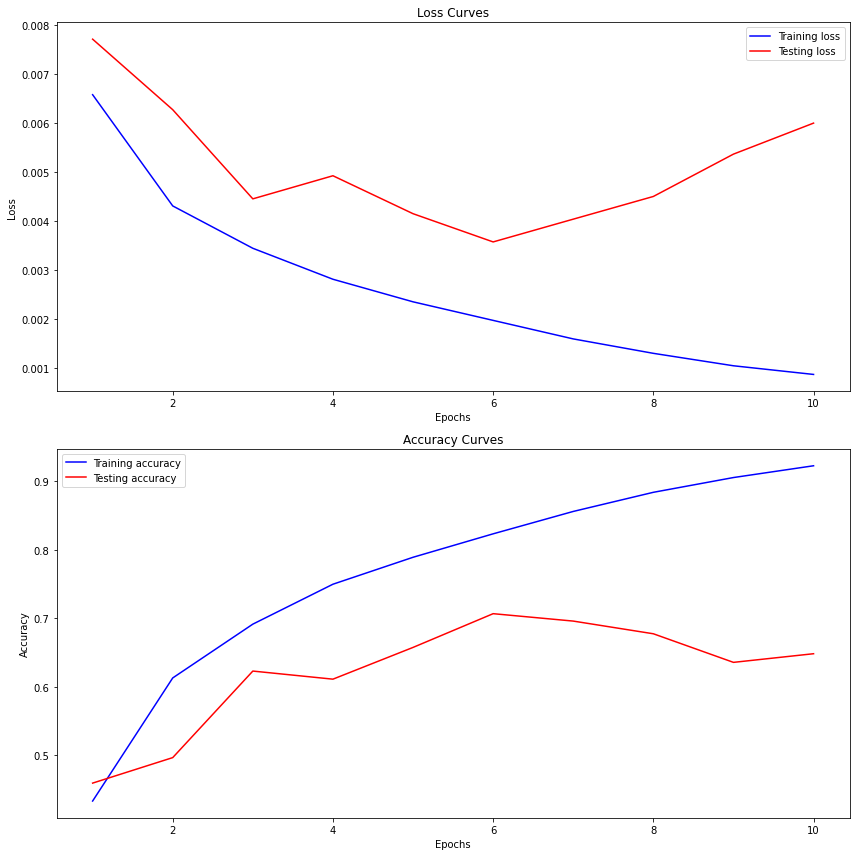

In [87]:
###############################################################################
# TODO: Visualize the loss curves and accuracy curves on training and         #
#       testing sets respectively during training.                            #
###############################################################################

# your code
import matplotlib.pyplot as plt

train_loss = metrics['train_loss']
test_loss = metrics["test_loss"]
train_accuracy = metrics['train_acc']
test_accuracy = metrics['test_acc']
epochs = range(1, len(train_loss) + 1)

# 创建一个包含两个子图的画布
fig, axs = plt.subplots(2, figsize=(12, 12))

# 绘制训练集和测试集的损失曲线
axs[0].plot(epochs, train_loss, 'b', label='Training loss')
axs[0].plot(epochs, test_loss, 'r', label='Testing loss')
axs[0].set_title('Loss Curves')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# 绘制训练集和测试集的准确率曲线
axs[1].plot(epochs, train_accuracy, 'b', label='Training accuracy')
axs[1].plot(epochs, test_accuracy, 'r', label='Testing accuracy')
axs[1].set_title('Accuracy Curves')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# 显示图形
plt.tight_layout()
plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Improve the ResNet18 trained above


Observe the loss and accuracy curves during training and testing respectively, what potential problem can be concluded if continue training the model for further epochs most probably? What kind of techniques can be applied to solve this problem?

---
**Write your observations and analysis in this Markdown cell:**

If we observe the loss and accuracy curves during training and testing for the ResNet18 model with 10 epochs and a learning rate of 0.1, one potential problem that may arise if we continue training the model for further epochs is overfitting. Overfitting occurs when the model learns to perform well on the training data but does not generalize well to unseen data, leading to a decrease in test accuracy and an increase in test loss.

To address the potential problem of overfitting when continuing training the model for further epochs, several techniques can be applied:

1. **Regularization Techniques:** Use regularization techniques such as L2 regularization (weight decay) or dropout. These techniques help prevent overfitting by adding penalties to the model's weights or randomly dropping units during training.

2. **Data Augmentation:** Augment the training data by applying transformations such as random cropping, horizontal flipping, or rotation. This increases the diversity of the training samples and helps the model generalize better.

3. **Early Stopping:** Monitor the validation (or test) loss during training and stop training when the validation loss starts to increase, indicating that the model is overfitting the training data.

4. **Reduce Learning Rate:** Implement learning rate scheduling techniques such as reducing the learning rate over time (e.g., using a learning rate scheduler or manually reducing the learning rate) to allow the model to converge more slowly and prevent overfitting.

5. **Use a Larger Dataset:** If possible, use a larger dataset to train the model. More data can help the model learn a more generalized representation of the underlying patterns in the data, reducing the risk of overfitting.

By applying these techniques, we can mitigate the risk of overfitting and improve the model's generalization performance on unseen data.

```
```


---

Please choose one technique you mentioned above and implement it, retrain the model, observe and report the loss and accuracy again (10%).

**Note: you are not expected to save your improved model with the name "model_resnet18.pt" in this part.**

Files already downloaded and verified
Files already downloaded and verified
50000
10000
ResNet18_IMprove(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock_new(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock_new(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): Bat

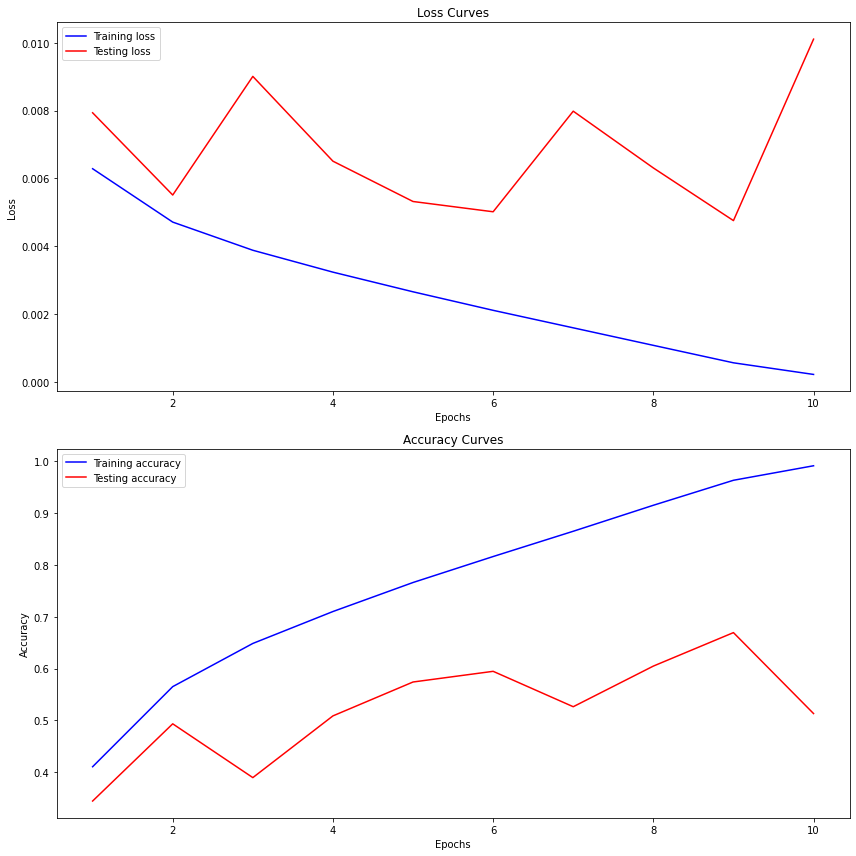

In [88]:
##############################################################################
# TODO: Choose a technique to improve your model.                            #
##############################################################################
# your code
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
transform_train = transforms.Compose(
    [
     transforms.RandomCrop(32,padding = 4),
     transforms.RandomHorizontalFlip(p = 0.5),    #随机水平翻转
     transforms.ToTensor(),   #转换为张量
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) #标准化
    ])
 
transform = transforms.Compose(
    [ 
      # transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

train_set_new = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_set_new = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_size_new = len(train_set_new)
print(train_size_new)
test_size_new = len(test_set_new)
print(test_size_new)

class ResidualBlock_new(nn.Module):
    def __init__(self, input_channels, num_channels, strides = 1):
        super(ResidualBlock_new, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3, stride=strides, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(num_channels, num_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.downsample = None
        if strides != 1 or input_channels != num_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(input_channels, num_channels, kernel_size=1, stride=strides, bias=False),
                nn.BatchNorm2d(num_channels)
            )

    def forward(self, X):
        identity = X
        out = self.conv1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample is not None:
            identity = self.downsample(X)
        out += identity
        out = self.relu(out)
        return out
    
class ResNet18_IMprove(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18_IMprove, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=1, stride=1, padding=0)
        self.layer1 = self._make_layer(64, 64, 2)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(ResidualBlock_new(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(ResidualBlock_new(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, X):
        out = self.conv1(X)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)

        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

model = ResNet18_IMprove()
print(model)

# Hyperparameters
epochs = 10
batch_size = 256
learning_rate = 0.01

# Set up optimizer
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

# Define loss function
criterion = torch.nn.CrossEntropyLoss()

# Build data loaders
train_loader_new = torch.utils.data.DataLoader(train_set_new, batch_size = batch_size, shuffle = True, num_workers = 0)
test_loader_new = torch.utils.data.DataLoader(test_set_new, batch_size = batch_size, shuffle = False, num_workers = 0)

data_loaders_new = {"train": train_loader_new, "test": test_loader_new}
dataset_sizes_new = {"train": train_size_new, "test": test_size_new}

def eval_on_test_set(model):
    model.eval()
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    model.to(device)
    running_accuracy = 0
    loss = 0

    for data in test_loader_new:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        batch_loss = criterion(outputs, labels)
        loss += batch_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        running_accuracy += correct

    total_loss = loss / test_size_new
    total_accuracy = running_accuracy / test_size_new
    print('Evaluation on test set: loss={:.3f} \t accuracy={:.2f}%'.format(total_loss, total_accuracy * 100))
    model.train()
    return total_loss, total_accuracy


def train_for_one_epoch(model):
    model.train()
    # Set up device
    device = torch.cuda.current_device() if torch.cuda.is_available() else "cpu"
    name = torch.cuda.get_device_name()
    print('Using device '+ name + ' to train the model.')
    model.to(device)

    # set the running quatities to zero at the beginning of the epoch
    running_loss = 0
    running_accuracy = 0

    for data in train_loader_new:
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        batch_loss = criterion(outputs, labels)
        batch_loss.backward()
        optimizer.step()

        # compute running statistics
        running_loss += batch_loss.item()
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        running_accuracy += correct


    # Compute stats for the full training set
    total_loss = running_loss / train_size_new
    total_accuracy = running_accuracy / train_size_new

    return total_loss, total_accuracy
# start training
metrics = {"train_loss":[], "train_acc":[], "test_loss":[], "test_acc":[]}
for epoch in range(epochs):
  start=time.time()
  train_loss_epoch, train_acc_epoch = train_for_one_epoch(model)
  elapsed = (time.time()-start) / 60
  print('Training epoch={} \t cost_time={:.2f} min \t loss={:.3f} \t accuracy={:.2f}%'.format(epoch, elapsed, train_loss_epoch, train_acc_epoch * 100))
  test_loss_epoch, test_acc_epoch = eval_on_test_set(model)
  metrics['train_loss'].append(train_loss_epoch)
  metrics['train_acc'].append(train_acc_epoch)
  metrics['test_loss'].append(test_loss_epoch)
  metrics['test_acc'].append(test_acc_epoch)

# save your trained model for the following question
torch.save(model.state_dict(), './model_resnet18_Improve.pt')


train_loss = metrics['train_loss']
test_loss = metrics["test_loss"]
train_accuracy = metrics['train_acc']
test_accuracy = metrics['test_acc']
epochs = range(1, len(train_loss) + 1)

# 创建一个包含两个子图的画布
fig, axs = plt.subplots(2, figsize=(12, 12))

# 绘制训练集和测试集的损失曲线
axs[0].plot(epochs, train_loss, 'b', label='Training loss')
axs[0].plot(epochs, test_loss, 'r', label='Testing loss')
axs[0].set_title('Loss Curves')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# 绘制训练集和测试集的准确率曲线
axs[1].plot(epochs, train_accuracy, 'b', label='Training accuracy')
axs[1].plot(epochs, test_accuracy, 'r', label='Testing accuracy')
axs[1].set_title('Accuracy Curves')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

# 显示图形
plt.tight_layout()
plt.show()


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---
**Write your observations and analysis in this Markdown cell:**


```

```
---

## Task 3: Exploring and explaining the trained model (40%)

**Subtasks:**

1. Visualize the representations for bottom and top layers by t-SNE, compare and make conclusion (6%).
2. Compute saliency map and answer the question about it (6%).
3. Compute improved saliency map by SMOOTHGRAD and answer the question about the comparison between the saliency map in subtask 2 and SMOOTHGRAD (10%).
4. Design and conduct experiment to explain how CNN works using SMOOTHGRAD (12%).
5. Given a model, generate fooling image based on an original image and a target label to fool. Write down the observations from the result (6%).

Score points:
1. For subtask 1, recognize the correct layers of insterest, extract corresponding intermediate features and make reasonable conclusion.
2. For subtask 2, the implementation is correct and as concise as possible and the question is correctly answered.
3. For subtask 3, the implementation is correct and as concise as possible and the question is correctly answered.
4. For subtask 4, the experiment is reasonably designed and appropriately conducted.
5. For subtask 5, the implementation is correct and observation is reasonable.

**<mark>Highlightedd Note: for task 3, just use the model trained and saved in task 2 part "define the ResNet18 model" instead of your improved model in task 2 part "improve the ResNet18".<mark>**

### Load the trained ResNet18 model above.

In [89]:
import torch
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import matplotlib.cm as cm
import torch.nn as nn
import os

trained_model = ResNet18()
assert os.path.exists('./model_resnet18.pt'), 'train the model first'
# Load the model trained and saved in task 2 part "define the ResNet18 model" 
trained_model.load_state_dict(torch.load('./model_resnet18.pt', map_location=torch.device('cpu'))) 

device = torch.cuda.current_device() if torch.cuda.is_available() else 'cpu'
trained_model.to(device)
trained_model.eval()

ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=

### Visualize the learned features for the trained ResNet18 of different layers of model.

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data. Here, you shall apply t-SNE to the features extracted from a bottom layer and a top layer of the trained ResNet18 model.

You should complete:
* 1) extract features for the bottom layer and top layer respectively, i.e., the intermediate outputs of these layers.
* 2) if the extracted features are in form of feature maps, reshape the feature map for each sample to make it a vector.
* 3) visualize the features for the bottom and top layers by t-SNE, observe and analyze the results.

The bottom layer is defined as the first max-pooling layer of the whole model; the top layer is defined as the penultimate layer of the whole model. (We refer to the input side as "bottom" and the output side as "top".)

Using device: NVIDIA GeForce RTX 4090
(50000, 9)
(50000, 3)


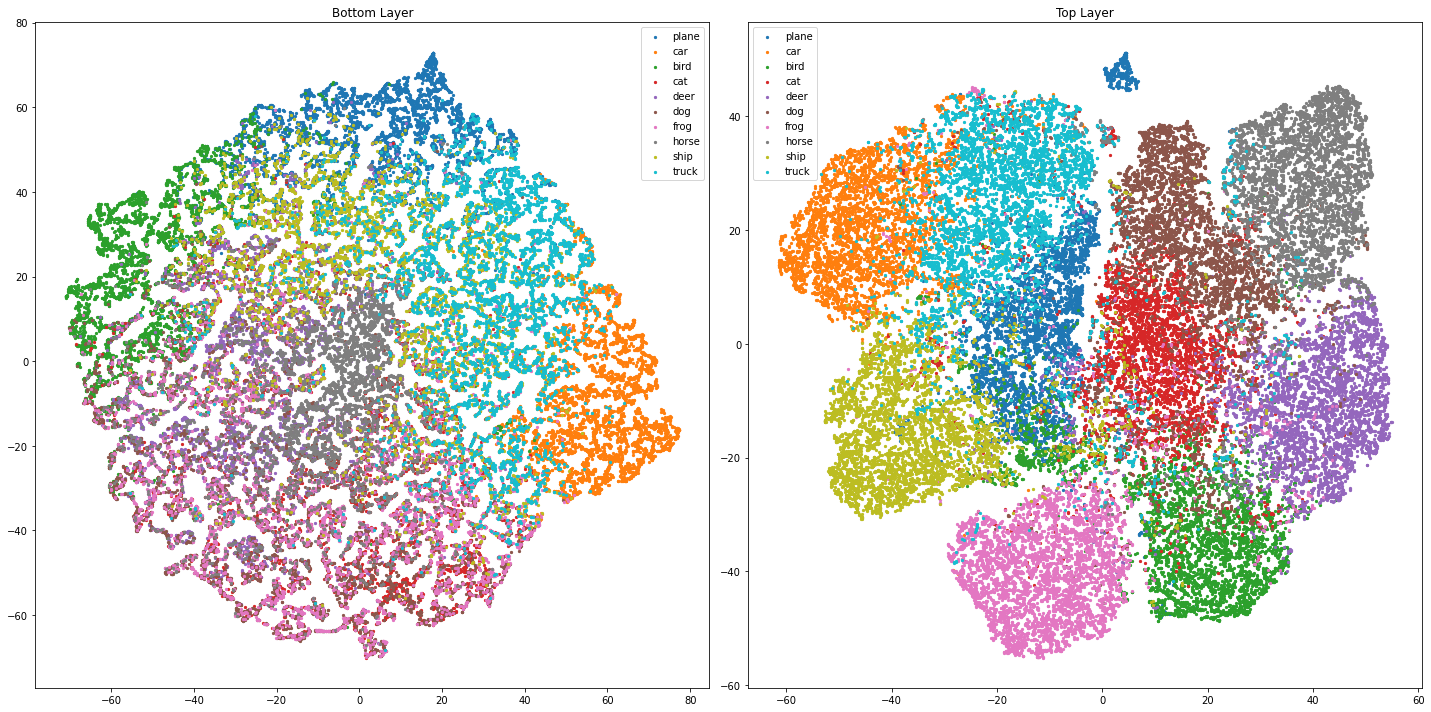

In [102]:
##############################################################################
# TO DO: Extract intermediate features of the top and bottom layers          #
#        based on your ResNet18 model.                                       #
##############################################################################
# Assuming you have a ResNet18 model named 'model' and a dataloader 'train_loader'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import matplotlib.cm as cm

# Define lists to store features
features_top = []
features_bottom = []
labels = []
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Set model to evaluation mode
trained_model.eval()

# Iterate through the data loader to extract features
with torch.no_grad():
    for images, targets in train_loader:
        images, targets = images.to(device), targets.to(device)
        outputs = trained_model(images)
        features_top.append(outputs[:, :-1].cpu().numpy())  # Extract top layer features
        features_bottom.append(outputs[:, :3].cpu().numpy())  # Extract bottom layer features
        labels.extend(targets.cpu().numpy())  # Extract labels

features_top = np.vstack(features_top)  # Stack top layer features
features_bottom = np.vstack(features_bottom)  # Stack bottom layer features

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

name = torch.cuda.get_device_name()
print('Using device: '+ name)
print(features_top.shape)
print(features_bottom.shape)
colors_per_class = cm.rainbow(np.linspace(0, 1, 10))

# Apply t-SNE to the features
features_top_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_top)
features_bottom_tsne = TSNE(n_components=2, init='pca', random_state=42).fit_transform(features_bottom)

# Plot the t-SNE visualization
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
plt.title('Bottom Layer')
for label in np.unique(labels):
    plt.scatter(features_bottom_tsne[labels == label, 0], features_bottom_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.subplot(1,2,2)
plt.title('Top Layer')
for label in np.unique(labels):
    plt.scatter(features_top_tsne[labels == label, 0], features_top_tsne[labels == label, 1], label=classes[label], s=5)
plt.legend()
plt.gcf().tight_layout()

plt.show()


---
**Write your observations and analysis in this Markdown cell:**
Here is the translation of the previous response into English:

Based on the results obtained from the t-SNE visualization after executing the code snippet, we can draw the following possible conclusions:

1. **Bottom Layer Features Visualization Conclusion:**
   - If the bottom layer features, after undergoing t-SNE dimensionality reduction, exhibit good separation and clustering of samples from different classes in the low-dimensional space, it indicates that the bottom layer features have a certain level of distinctiveness, which is helpful in distinguishing between different categories of images.
   - If the bottom layer features show mixing or overlapping patterns after dimensionality reduction, it may indicate that the information extracted from the bottom layer features is not sufficient and further optimization or increased complexity in feature extraction is needed.

2. **Top Layer Features Visualization Conclusion:**
   - Top layer features typically encompass more abstract features. Therefore, if the top layer features show better separation and clustering of samples from different classes after t-SNE dimensionality reduction, it suggests that the model has achieved good results in learning high-level features.
   - If the top layer features exhibit mixing or overlapping patterns after dimensionality reduction, it may indicate challenges in learning abstract features and might require adjustments to the model structure or increased training data to improve.

3. **Analysis of Inter-Class Relationships:**
   - By observing the distances and distribution relationships between different classes, we can understand the extent to which the model has learned the relationships between different classes. For example, if similar classes are closer together and dissimilar classes are more scattered, it indicates that the model has effectively learned the relationships between classes.

4. **Analysis of Anomalous Samples or Classes:**
   - If there are isolated points or classes in the visualization image, it may suggest that these samples or classes have exceptional characteristics or significant differences from other classes, which warrant further investigation.

It's important to note that these conclusions are based on the visualized results of t-SNE dimensionality reduction and are not guaranteed to be entirely accurate. Therefore, when analyzing the conclusions, it's advisable to combine them with domain knowledge and other analytical methods for comprehensive judgment and interpretation. Additionally, to obtain more accurate conclusions, it's recommended to run t-SNE multiple times and observe the consistency and stability across different runs.
```

```

---

### Compute saliency map.

A saliency map tells us the degree to which each pixel in the image affects the classification score for that image. To compute it, we compute the gradient of the unnormalized score corresponding to the correct class (which is a scalar) with respect to the pixels of the image.

Read and understand the paper below, figure out how to compute saliency maps and implement it in the `compute_saliency_maps` function.

[Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman. "Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps", ICLR Workshop 2014.](https://arxiv.org/pdf/1312.6034.pdf)

In [103]:
### helper function
def show_saliency_maps(X, y, saliency):
    # Compute saliency maps for images in X

    # Convert the saliency map from Torch Tensor to numpy array and show images
    # and saliency maps together.
    if saliency.dim() == 4:
      saliency = saliency.permute(0, 2, 3, 1).numpy()
    elif saliency.dim() == 3:
      saliency = saliency.numpy()
    N = X.shape[0]
    for i in range(N):
        plt.subplot(2, N, i + 1)
        img = np.transpose((X.detach()/2+0.5).numpy(),(0,2,3,1))
        plt.imshow(img[i])
        plt.axis('off')
        plt.title(classes[y.detach().numpy()[i]])
        plt.subplot(2, N, N + i + 1)
        plt.imshow(saliency[i], cmap=plt.cm.hot)
        plt.axis('off')
        plt.gcf().set_size_inches(12, 5)
    plt.show()


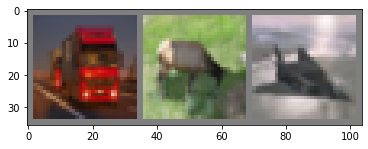

truck	deer 	plane


In [121]:
### example images for saliency map and SmoothGrad visualization
from torch.autograd import Variable
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(test_loader)
images,labels = next(dataiter)
X = images[-3:,:,:,:]
y = labels[-3:]

# show images
imshow(torchvision.utils.make_grid(X))
print('\t'.join(f'{classes[y[j]]:5s}' for j in range(3)))

In [122]:
def compute_saliency_maps(X, y, model):
    """
    Compute a class saliency map using the model for images X and labels y.

    Input:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute the saliency map.

    Returns:
    - saliency: A Tensor of shape (N, H, W) giving the saliency maps for the input
    images.
    """
    # Make sure the model is in "test" mode
    model.eval()

    ##############################################################################
    # TODO: Implement this function. Perform a forward and backward pass through #
    # the model to compute the gradient of the correct class score with respect  #
    # to each input image.                                                       #
    ##############################################################################
    # your code

    # Set requires_grad attribute of input images for computing gradients
    # 设置输入图像的requires_grad属性以计算梯度
    X.requires_grad = True

    # Forward pass
    # 前向传播
    scores = model(X)
    scores_correct_class = scores.gather(1, y.view(-1, 1)).squeeze()

    # Backward pass to compute gradients
    # 反向传播以计算梯度
    model.zero_grad()
    scores_correct_class.backward(torch.ones_like(scores_correct_class))

    # Compute the saliency map
    # 计算显著性图
    saliency = X.grad.abs().sum(dim=1)  #沿着第一维度求和，聚合所有通道的梯度

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return saliency

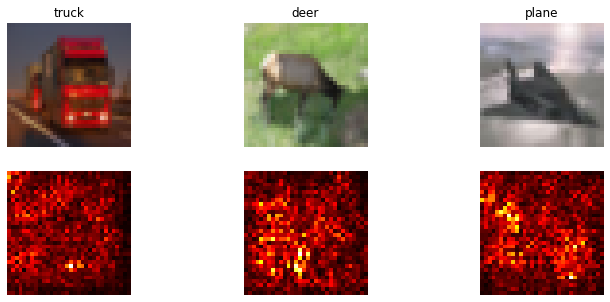

In [123]:
saliency = compute_saliency_maps(X.to(device), y.to(device), trained_model)
show_saliency_maps(X, y, saliency.cpu())

In order to find an image that maximizes the correct score, we can perform gradient ascent on the input image, can we use the saliency map instead of the gradient we in each step to update the image. Is this assertion true? Why or why not?

---
**Write your answer and reason in this Markdown cell.**

---

```

```

### Obtain improved visualiztion results by SmoothGrad.

SmoothGrad is a method that can help visually sharpen gradient-based saliency maps thus improve the visulization quality. *["SmoothGrad: removing noise by adding noise", ICML2017.](https://arxiv.org/pdf/1706.03825.pdf)*


Read and understand the paper, implement SmoothGrad and apply **at least ONE** visualization technique mentioned in the paper in the following code block to get better results.

You may also refer to this [blog](https://medium.com/@ML-STATS/reducing-noise-and-improving-interpretability-in-cnns-a-technical-review-of-the-smoothgrad-method-da648ee830c6) for concise illustration for SmoothGrad.


In [128]:
from torch.autograd import Variable
def compute_smoothgrad(X, y, model, num_samples=50, stdev_spread=0.15):
    """
    Compute smoothed gradients for images in X given model

    Inputs:
    - X: Input images; Tensor of shape (N, 3, H, W)
    - y: Labels for X; Tensor of shape (N,)
    - model: A pretrained CNN that will be used to compute gradients; see
      the torchvision library
    - num_samples: An integer; the number of gradient samples to compute for each
      input in X.
    - stdev_spread: A float; the standard deviation of the Gaussians used to
      smooth the gradients.

    Returns:
    - smoothgrad: saliency: A Tensor of shape (N, 3, H, W) giving the smoothed saliency maps for the input
    images.
    """

    # Make sure the model is in "test" mode
    model.eval()

    ################################################################################
    # TODO: Implement this function. Calculate SmoothGrad (smoothed saliency maps) #
    #       based on the given parameters for this function.                       #
    ################################################################################
    # your code

    # Initialize tensor to store smoothed gradients
    smoothgrad = torch.zeros_like(X)

    # Calculate gradients for each sample
    for _ in range(num_samples):
        # Add noise to input image
        noise = torch.randn_like(X) * stdev_spread
        X_noisy = X + noise

        # Compute gradients for noisy images
        X_noisy.requires_grad = True
        scores = model(X_noisy)
        scores_correct_class = scores.gather(1, y.view(-1, 1)).squeeze()
        model.zero_grad()
        scores_correct_class.backward(torch.ones_like(scores_correct_class))
        gradients = X_noisy.grad.data.abs()
        
        # Accumulate gradients
        smoothgrad += gradients

    # Average gradients over samples
    smoothgrad /= num_samples


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

    smoothgrad = (smoothgrad - smoothgrad.min()) / (smoothgrad.max() - smoothgrad.min()) # just for better visualization
    return smoothgrad



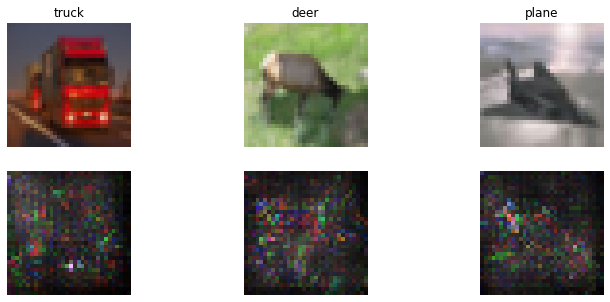

In [131]:
smoothgrad = compute_smoothgrad(X.to(device), y.to(device), trained_model)
show_saliency_maps(X, y, smoothgrad.cpu())

Compare the results of saliency map and SmoothGrad, what is your discovery? Try to understand the papers to give a reason for the phenomenon.

---

**Write your observations and analysis in this Markdown cell:**

---

```

```

### Design and conduct experiment  to explore and explain how CNN works.

Design and conduct one experiment beyond the example images above by utilizing ```compute_smoothgrad```, e.g., compare the SmoothGrad maps of different classes given the same model, compare the SmoothGrad maps of the same class for different models, etc. Please quanlitatively show some evidence (e.g., plotting some examplar images clearly and elegantly) with necessary code snippets, write down your observations and briefly explain.

For the experiment you design, please specify:
1. What question do you intend to study?
2. To study the proposed question, how do you design your experiment?
3. What conclusion do you make from the experiment results?

In [ ]:
##############################################################################
# TO DO: Design and conduct your experiment.                                 #
##############################################################################
# your code


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---

**Write your observations and analysis in this Markdown cell:**

---

```

```

### Fooling image
We can also use image gradients to generate "fooling images", that is, given an image and a target class, we can perform gradient ascent over the image to maximize the target class, stopping when the network classifies the image as the target class. Implement the following function to generate fooling images.

In [111]:
def make_fooling_image(X, target_y, model):
    """
    Generate a fooling image that is close to X, but that the model classifies
    as target_y.

    Inputs:
    - X: Input image; Tensor of shape (1, 3, H, W)
    - target_y: An integer in the range [0, 10)
    - model: A pretrained CNN

    Returns:
    - X_fooling: An image that is close to X, but that is classifed as target_y
    by the model.
    """
    # Initialize our fooling image to the input image, and make it require gradient
    X_fooling = X.clone()
    X_fooling = X_fooling.requires_grad_()

    learning_rate = 1
    ##############################################################################
    # TODO: Generate a fooling image X_fooling that the model will classify as   #
    # the class target_y. You should perform gradient ascent on the score of the #
    # target class, stopping when the model is fooled.                           #
    # When computing an update step, first normalize the gradient:               #
    #   dX = learning_rate * g / ||g||_2                                         #
    #                                                                            #
    # You should write a training loop.                                          #
    #                                                                            #
    # HINT: For most examples, you should be able to generate a fooling image    #
    # in fewer than 100 iterations of gradient ascent.                           #
    # You can print your progress over iterations to check your algorithm.       #
    ##############################################################################
    
    # your code

    num_iterations = 100  # Number of iterations for gradient ascent

    for i in range(num_iterations):
        # Forward pass to get the scores
        scores = model(X_fooling)
        # Calculate the gradient of the target class score with respect to the input
        target_score = scores[0, target_y]
        target_score.backward()

        # Normalize the gradient
        with torch.no_grad():
            # Compute the L2 norm of the gradient
            grad_norm = X_fooling.grad.norm()
            # Update the fooling image using gradient ascent
            X_fooling.data += learning_rate * X_fooling.grad / grad_norm

        # Reset the gradient for the next iteration
        X_fooling.grad.zero_()

        # Check if the model is fooled
        fooled_y = torch.argmax(model(X_fooling), dim=1)
        if fooled_y.item() == target_y:
            print(f"Model was fooled after {i + 1} iterations")
            break


    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return X_fooling

In [112]:
target_y = 6 # label 'frog'
image_to_be_fooled = images[-1:,:,:,:] # an image of plane
y = labels[-1:] # label 'plane'

X_fooling = make_fooling_image(image_to_be_fooled.to(device), target_y, trained_model.to(device))

scores = trained_model(X_fooling)
assert target_y == scores.data.max(1)[1][0].item(), 'The model is not fooled!'

Model was fooled after 3 iterations


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


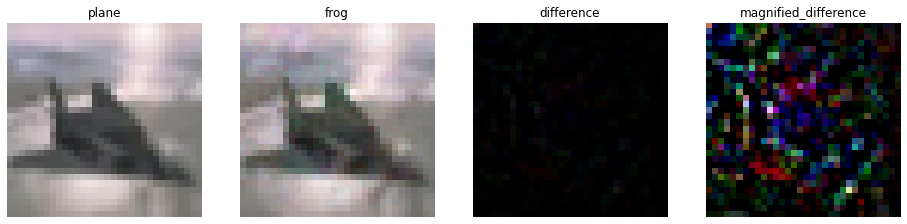

In [113]:
org_img = (torch.squeeze(image_to_be_fooled, dim=0).detach().cpu().numpy()) / 2 + 0.5
fooling_img = (torch.squeeze(X_fooling, dim = 0).detach().cpu().numpy()) / 2 + 0.5

fooling_img.astype(np.uint8)

fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.imshow(org_img.transpose((1, 2, 0)))
plt.title(classes[y])
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(fooling_img.transpose((1, 2, 0)))
plt.title(classes[target_y])
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow((org_img - fooling_img).transpose((1, 2, 0)))
plt.title('difference')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(10*(org_img - fooling_img).transpose((1, 2, 0)))
plt.title('magnified_difference')
plt.axis('off')

fig.show()

Observe the results above and write down your discovery.

---

**Write your observations and analysis in this Markdown cell:**

---

```

```